In [81]:
import pandas as pd  
#loading dataset
url='https://raw.githubusercontent.com/Prachifox/Cardiovascular_diseases/master/cardio_train.csv'
df= pd.read_csv(url,sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [83]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
df.isnull().values.any()

False

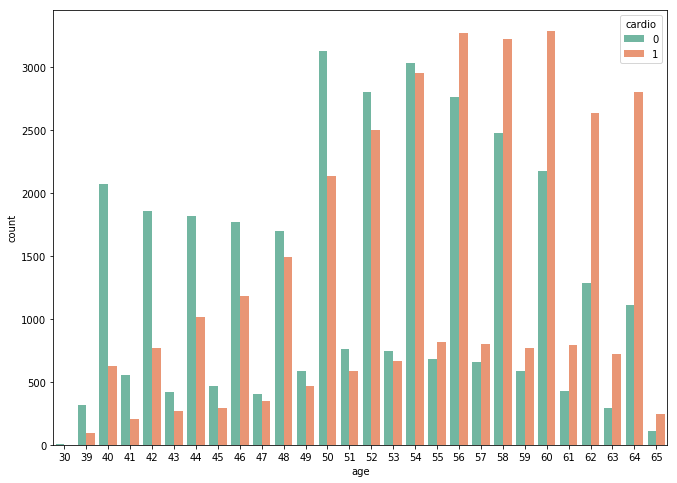

In [85]:
from matplotlib import rcParams                                     #people above 55 have high risk of cardiovascular diseases
import seaborn as sns
rcParams['figure.figsize'] = 11, 8
df['age'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='age', hue='cardio', data = df, palette="Set2");

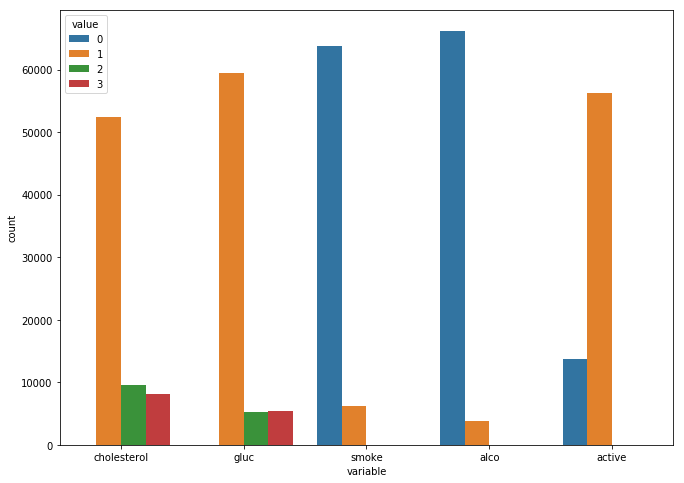

In [86]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));

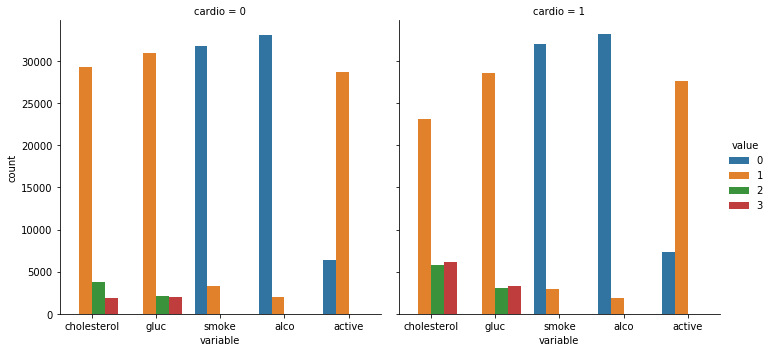

In [87]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col='cardio',data=df_long, kind="count");

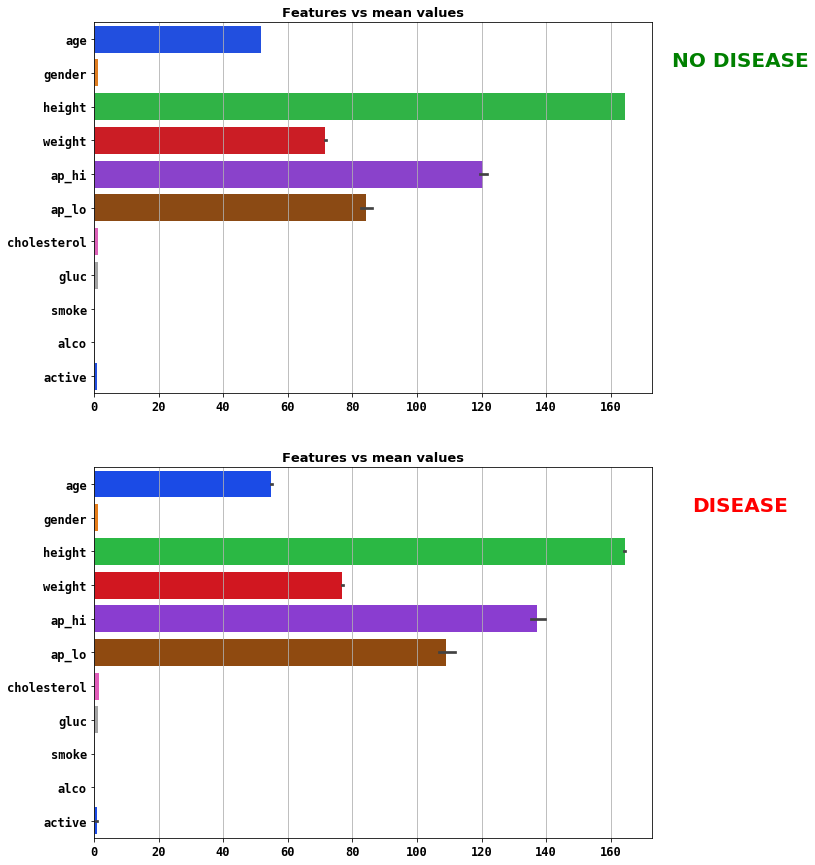

In [88]:
import matplotlib.pyplot as plt
data=df[['age', 'gender','height', 'weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']]
data1 = data[data['cardio']==0] # no disease  
data1 = data1.iloc[:,:-1]

data2 = data[data['cardio']==1] # with disease
data2 = data2.iloc[:,:-1]

fig = plt.figure(figsize=(10,15))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212,sharex=ax1)

ax1.grid()
ax2.grid()

ax1.set_title('Features vs mean values',fontsize=13,weight='bold')
ax1.text(200,0.8,'NO DISEASE',fontsize=20,horizontalalignment='center',color='green',weight='bold')


ax2.set_title('Features vs mean values',fontsize=13,weight='bold')
ax2.text(200,0.8,'DISEASE',fontsize=20,horizontalalignment='center',color='red',weight='bold')

# for axis ax1
plt.sca(ax1)
plt.xticks(rotation = 0, 
           weight='bold', 
           family='monospace',
           size='large')
plt.yticks( weight='bold', 
           family='monospace',
           size='large')
# for axis ax2
plt.sca(ax2)
plt.xticks(rotation = 0, 
           weight='bold', 
           family='monospace',
           size='large')
plt.yticks( weight='bold', 
           family='monospace',
           size='large')

# sns.set_style('whitegrid')

sns.barplot(data=data1,ax=ax1,orient='horizontal', palette='bright') # no disease
sns.barplot(data=data2,ax=ax2,orient='horizontal',palette='bright',saturation=0.80) # with disease

[None, None, None, None]

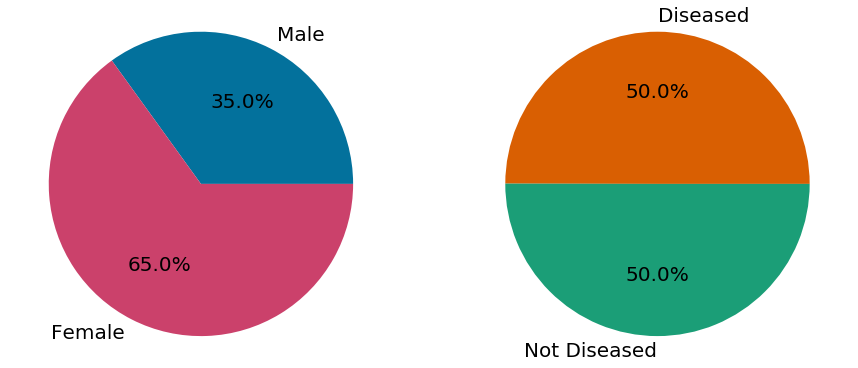

In [89]:
fig= plt.figure(figsize=(15,6)) 
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

only_gender = data['gender']
 
male_tot = only_gender[only_gender==2]                  #since 2 denotes men

no_of_male = len(male_tot)
no_of_female = len(data) - len(male_tot)

m_vs_f = [no_of_male,no_of_female]


with_disease = data[data['cardio']==1]
not_with_disease = data[data['cardio']==0]

with_disease = with_disease['gender']

no_of_diseased = len(with_disease)
no_of_not_diseased = len(data) - len(with_disease)

d_vs_healthy = [no_of_diseased,no_of_not_diseased]

ax1.axis('equal')
ax2.axis('equal')

# pie plot
wedges, texts, autotexts= ax1.pie(m_vs_f, 
                                  labels=('Male','Female'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['xkcd:ocean blue','xkcd:dark pink'],
                                  autopct="%1.1f%%")

# pie plot
wedges2, texts2, autotexts2 = ax2.pie(d_vs_healthy, 
                                  labels=('Diseased','Not Diseased'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['#d95f02','#1b9e77'],
                                  autopct="%1.1f%%")


plt.setp(autotexts,size=20)
plt.setp(texts,size=20)
plt.setp(autotexts2,size=20)
plt.setp(texts2,size=20)
#print(m_vs_f)


Text(0, 0.04, 'Female')

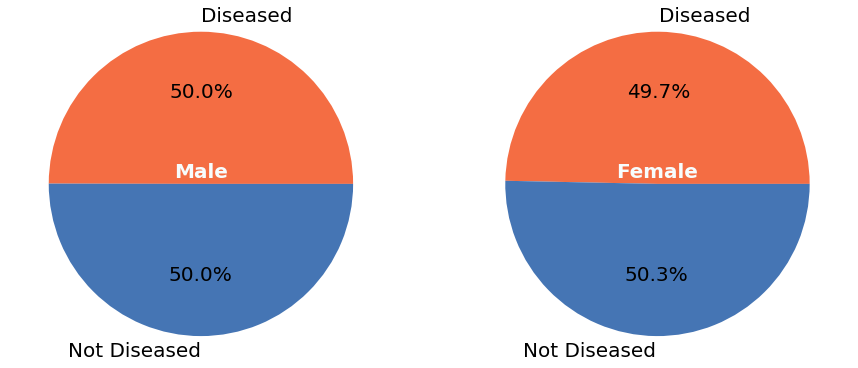

In [90]:
fig= plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

with_disease = data[data['cardio']==1]
not_with_disease = data[data['cardio']==0]

with_disease_m = with_disease[with_disease['gender']==2]
with_disease_m = with_disease['gender']
not_with_disease_m = not_with_disease[not_with_disease['gender']==2]
not_with_disease_m = not_with_disease['gender']

with_disease_f = with_disease[with_disease['gender']==1]
not_with_disease_f = not_with_disease[not_with_disease['gender']==1]

no_of_diseased_m = len(with_disease_m)
no_of_not_diseased_m = len(not_with_disease_m)

no_of_diseased_f = len(with_disease_f)
no_of_not_diseased_f = len(not_with_disease_f)

d_vs_healthy_m = [no_of_diseased_m, no_of_not_diseased_m]
d_vs_healthy_f = [no_of_diseased_f, no_of_not_diseased_f]

ax1.axis('equal')
ax2.axis('equal')
# pie plot

wedges, texts, autotexts = ax1.pie(d_vs_healthy_m, 
                                  labels=('Diseased','Not Diseased'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['#f46d43','#4575b4'],
                                  autopct="%1.1f%%")

wedges2, texts2, autotexts2 = ax2.pie(d_vs_healthy_f, 
                                  labels=('Diseased','Not Diseased'),
                                  radius=1,
                                  textprops=dict(color='k'),
                                  colors=['#f46d43','#4575b4'],
                                  autopct="%1.1f%%")

plt.setp(autotexts,size=20)
plt.setp(texts,size=20)

plt.setp(autotexts2,size=20)
plt.setp(texts2,size=20)

ax1.text(0,0.04,'Male',size=20,color='#f7fcfd',horizontalalignment='center',weight='bold')
ax2.text(0,0.04,'Female',size=20,color='#f7fcfd',horizontalalignment='center',weight='bold')


In [91]:
print("Diastilic pressure is higher than systolic blood pressure in {0} cases".format(data[data['ap_lo']> data['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic blood pressure in 1234 cases


In [92]:
data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.975)) | (data['ap_hi'] < data['ap_hi'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.975)) | (data['ap_lo'] < data['ap_lo'].quantile(0.025))].index,inplace=True)
print("Diastilic pressure is higher than systolic blood pressure in {0} cases".format(data[data['ap_lo']> data['ap_hi']].shape[0]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Diastilic pressure is higher than systolic blood pressure in 0 cases


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
data=(data-data.min())/(data.max()-data.min())

In [0]:
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
all_features = data[['age', 'gender','height', 'weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']].values

all_classes = data['cardio'].values

feature_names = ['age', 'gender','height', 'weight','ap_hi','ap_lo','cholestrol','gluc','smoke','alco','active']

In [96]:
# feature extraction
test = SelectKBest(score_func=chi2, k=9)
fit = test.fit(all_features,all_classes)
print(fit.scores_)
features_univariate = fit.transform(all_features)
print(features_univariate[:5,:])

[2.06198951e+02 1.90548946e-03 6.29816199e-02 3.16314194e+01
 1.40539810e+03 6.02761855e+02 2.02821447e+03 3.63793491e+02
 2.28377042e+01 8.47064282e+00 1.87620150e+01]
[[0.57142857 0.26984127 0.14285714 0.5        0.         0.
  0.         0.         1.        ]
 [0.71428571 0.39153439 0.57142857 0.75       1.         0.
  0.         0.         1.        ]
 [0.62857143 0.28042328 0.42857143 0.25       1.         0.
  0.         0.         0.        ]
 [0.51428571 0.37566138 0.71428571 1.         0.         0.
  0.         0.         1.        ]
 [0.51428571 0.23809524 0.         0.         0.         0.
  0.         0.         0.        ]]


In [97]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model,9)
fit = rfe.fit(all_features,all_classes)
print("Num Features: %d" % (fit.n_features_))
print("Selected Features: %s"%(fit.support_))
print("Feature Ranking: %s" %(fit.ranking_))

Num Features: 9
Selected Features: [ True False  True  True  True  True  True  True False  True  True]
Feature Ranking: [1 3 1 1 1 1 1 1 2 1 1]


In [0]:
features_rfe = data[['age','height', 'weight','ap_hi','ap_lo','cholesterol','gluc','alco','active']].values



In [99]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(all_features,all_classes)
print(model.feature_importances_)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.13599244 0.01091328 0.2466391  0.26362039 0.15163722 0.10680719
 0.04743394 0.01675838 0.0069891  0.0044671  0.00874185]


In [0]:
features_tree = data[['age', 'gender','height', 'weight','ap_hi','ap_lo','cholesterol','gluc','smoke']].values

In [101]:
import numpy
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(features_univariate, all_classes, train_size=0.75, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
clf_uni = LogisticRegression(solver='lbfgs')
cv_scores = cross_val_score(clf_uni,features_univariate, all_classes, cv=10)
cv_scores.mean()

0.7233090228068046

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
clf_uni = LogisticRegression(solver='lbfgs')
cv_scores = cross_val_score(clf_uni,features_rfe, all_classes, cv=10)
cv_scores.mean()

0.7231881335191334

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
clf_uni = LogisticRegression(solver='lbfgs')
cv_scores = cross_val_score(clf_uni,features_tree, all_classes, cv=10)
cv_scores.mean()

0.7219492825080205

In [105]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
clf = MultinomialNB()
cv_scores = cross_val_score(clf,features_univariate, all_classes, cv=10)

cv_scores.mean()

0.6056077980938577

In [106]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
clf = MultinomialNB()
cv_scores = cross_val_score(clf,features_tree, all_classes, cv=10)

cv_scores.mean()

0.6348707004407025

In [107]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
clf = MultinomialNB()
cv_scores = cross_val_score(clf,features_rfe, all_classes, cv=10)

cv_scores.mean()

0.6221353175364086

In [0]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def create_model():
    model = Sequential()
    #4 feature inputs going into an 6-unit layer (more does not seem to help - in fact you can go down to 4)
    model.add(Dense(400, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(400, kernel_initializer='normal', activation='relu'))
    model.add(Dense(400, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification (benign or malignant)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model; adam seemed to work best
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [110]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model, epochs=100, verbose=1)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator,features_tree, all_classes, cv=2)
cv_scores.mean()

Epoch 1/100
33096/33096 [==============================] - 9s 286us/sample - loss: 0.5669 - acc: 0.7158
Epoch 2/100
33096/33096 [==============================] - 9s 273us/sample - loss: 0.5596 - acc: 0.7215
Epoch 3/100
33096/33096 [==============================] - 9s 275us/sample - loss: 0.5579 - acc: 0.7211
Epoch 4/100
33096/33096 [==============================] - 9s 281us/sample - loss: 0.5565 - acc: 0.7211
Epoch 5/100
33096/33096 [==============================] - 10s 293us/sample - loss: 0.5550 - acc: 0.7243
Epoch 6/100
33096/33096 [==============================] - 9s 278us/sample - loss: 0.5538 - acc: 0.7253
Epoch 7/100
33096/33096 [==============================] - 9s 285us/sample - loss: 0.5527 - acc: 0.7260
Epoch 8/100
33096/33096 [==============================] - 9s 284us/sample - loss: 0.5531 - acc: 0.7254
Epoch 9/100
33096/33096 [==============================] - 9s 280us/sample - loss: 0.5518 - acc: 0.7256
Epoch 10/100
33096/33096 [==============================] - 9s 

0.7196530997753143